<a href="https://colab.research.google.com/github/michaelhasey/Archi_Base/blob/master/1_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Connect to Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **B. Build & Train RNN model**

#### **1. Imports / Installs**

In [0]:
pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 21.6MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
import os

#### **2. Change directory**

In [0]:
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/GA_Capstone':
    os.chdir('/content/drive/My Drive/Colab Notebooks/GA_Capstone')
    print("Directory changed.") 

Directory changed.


#### **3. Load data**

In [0]:
import os
labels = os.listdir("Data/1_training_data")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
      print("{}, {} files".format(label, len(os.listdir("Data/1_training_data/"+label))))

No. of labels: 9
-----------------
models, 5 files
posters_books, 201 files
people, 101 files
drawings, 201 files
aerial, 301 files
interior, 301 files
closeup, 301 files
street, 301 files
texture, 301 files


In [0]:
# If any files need to be removed
labels.remove('models')

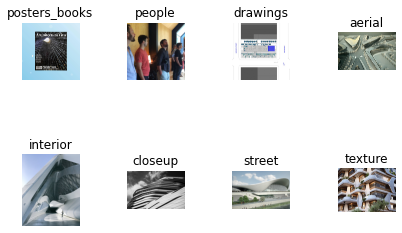

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(nrows=2, ncols=4)
fig.tight_layout()
cnt = 0
for row in ax:
    for col in row:
        image_name = np.random.choice(os.listdir("Data/1_training_data/" + labels[cnt]))
        im = Image.open("Data/1_training_data/{}/{}".format(labels[cnt],image_name))
        col.imshow(im)
        col.set_title(labels[cnt])
        col.axis('off')
        cnt += 1
plt.show()

#### **4. Create model**

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path = "./Data/1_training_data/"
size = 224
bs = 64

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=False),
                                  valid_pct=0.2, size=size, bs=bs)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
posters_books,posters_books,posters_books,posters_books,posters_books
Path: Data/1_training_data;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
texture,drawings,drawings,closeup,texture
Path: Data/1_training_data;

Test: None

In [0]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


#### **5. Determine model's best learning rate**

In [0]:
# learner.lr_find()
# learner.recorder.plot()

#### **6. Fit model**

epoch,train_loss,valid_loss,accuracy,time
0,1.663365,0.477455,0.850000,02:37
1,0.980022,0.283897,0.910000,01:16
2,0.691287,0.270999,0.915000,01:16
3,0.551337,0.349041,0.902500,01:16
4,0.478905,0.309997,0.907500,01:16
5,0.433914,0.345890,0.902500,01:16
6,0.402701,0.323627,0.895000,01:14
7,0.373118,0.269987,0.900000,01:13
8,0.315268,0.226447,0.905000,01:17
9,0.285231,0.305518,0.915000,01:16


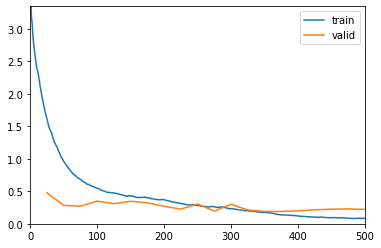

In [0]:
learner.fit_one_cycle(20, max_lr=slice(1e-4, 1e-2))
# This passes a range of learning rates...meaning train the first layers
# at 1e-3 and the last layers at le-2....the earlier layers dont need
# to train more because they are much simpler...hence a lower learning rate.

#### **7. Save / load model weights (if required)**

In [0]:
learner.save('weights_7')
# learner.load('weights_5')

In [0]:
learner.export('weights_7_export')

#### **8. Model analysis**

In [0]:
interpreter = ClassificationInterpretation.from_learner(learner)

In [0]:
interpreter.most_confused(min_val=2)

[('texture', 'closeup', 7),
 ('closeup', 'street', 6),
 ('texture', 'interior', 3),
 ('aerial', 'street', 2),
 ('closeup', 'texture', 2)]

#### **9. Model results**

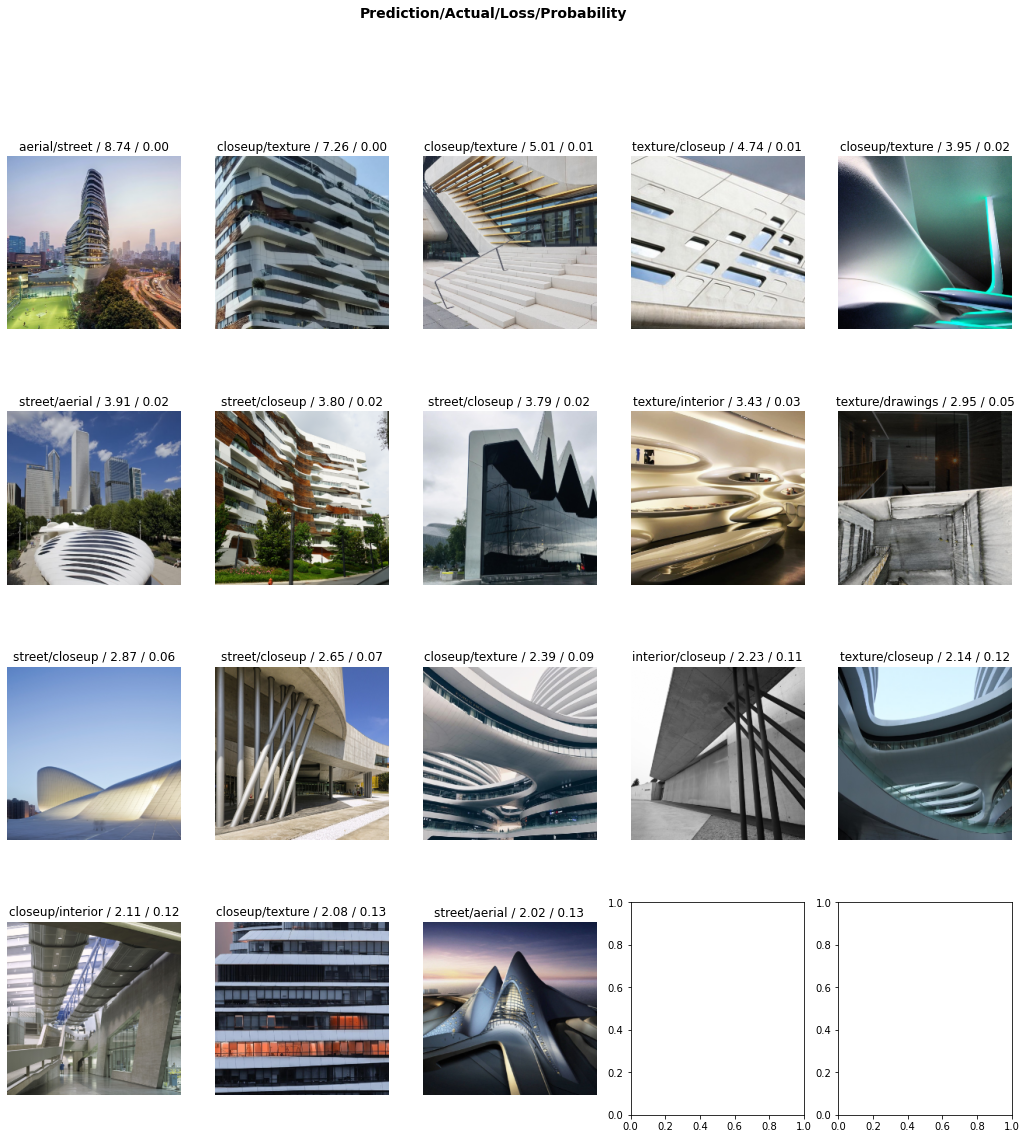

In [0]:
interpreter.plot_top_losses(18, figsize=(18,18))

# shows predictions with largest loss function (biggest error)

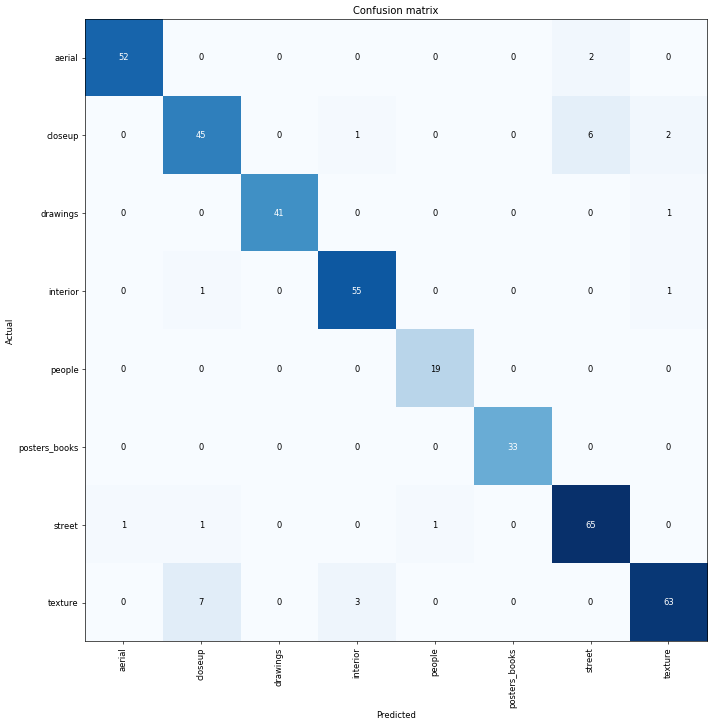

In [0]:
interpreter.plot_confusion_matrix(figsize=(12,12), dpi=60)

#### **10. MODEL RESULTS - MORE INFO**

In [0]:
# to understand results, access detailed info from documents

doc(interpreter.plot_top_losses)